**Renata Alfianto Rasyid (1301213304) - IF 44 DS02**

Data berisi koordinat dari masing2 ibukota provinsi di Indonesia.

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

ibukota_provinsi = {
    "Banda Aceh": (5.54167,	95.33333),
    "Medan": (3.65, 98.66667),
    "Padang": (-0.98333, 100.45),
    "Pekanbaru": (0.53333, 101.46667),
    "Tanjung Pinang": (0.91683, 104.44329),
    "Jambi": (-1.61667, 103.65),
    "Palembang": (-3, 104.71667),
    "Pangkal Pinang": (-2.13333, 106.13333),
    "Bengkulu": (-3.81667, 102.31667),
    "Bandar Lampung": (-5.41667, 105.25),
    "Jakarta": (-6.1777, 106.8403),
    "Bandung": (-6.9175, 107.62444),
    "Serang": (-6.12563, 106.14999),
    "Semarang": (-7.03333, 110.38333),
    "Yogyakarta": (-7.8, 110.375),
    "Surabaya": (-7.26667, 112.71667),
    "Denpasar": (-8.66667, 115.21663),
    "Mataram": (-8.5833, 116.1167),
    "Kupang": (-10.21667, 123.6),
    "Pontianak": (-0.08333, 109.36667),
    "Palangka Raya": (-1.76979, 113.73126),
    "Banjarmasin": (-3.32444, 114.59102),
    "Samarinda": (-0.43333, 117.18333),
    "Tanjung Selor": (2.843519, 117.365999),
    "Manado": (1.51667, 124.88333),
    "Palu": (-0.86972, 119.9),
    "Makassar": (-5.15, 119.45),
    "Kendari": (-3.98333, 122.5),
    "Gorontalo": (0.53333, 123.1),
    "Mamuju": (-2.5, 119.41667),
    "Ambon": (-3.7, 128.18333),
    "Sofifi": (0.7244 , 127.5806),
    "Manokwari": (-0.9, 133.75),
    "Nabire": (-3.54016, 135.55511),
    "Merauke": (-7.66667, 139.66667),
    "Sorong": (-0.86507, 131.25153),
    "Jayapura": (-2.64647, 140.77779)
}

Membuat visualisasi jaringan yang merepresentasikan jalur yang menghubungkan kota-kota ibukota provinsi di Indonesia (hanya sekedar menghubungkan tanpa melihat kemungkinan jalur bisa dilalui atau tidak).

Degree Centrality: {'Banda Aceh': 1.0, 'Medan': 1.0, 'Padang': 1.0, 'Pekanbaru': 1.0, 'Tanjung Pinang': 1.0, 'Jambi': 1.0, 'Palembang': 1.0, 'Pangkal Pinang': 1.0, 'Bengkulu': 1.0, 'Bandar Lampung': 1.0, 'Jakarta': 1.0, 'Bandung': 1.0, 'Serang': 1.0, 'Semarang': 1.0, 'Yogyakarta': 1.0, 'Surabaya': 1.0, 'Denpasar': 1.0, 'Mataram': 1.0, 'Kupang': 1.0, 'Pontianak': 1.0, 'Palangka Raya': 1.0, 'Banjarmasin': 1.0, 'Samarinda': 1.0, 'Tanjung Selor': 1.0, 'Manado': 1.0, 'Palu': 1.0, 'Makassar': 1.0, 'Kendari': 1.0, 'Gorontalo': 1.0, 'Mamuju': 1.0, 'Ambon': 1.0, 'Sofifi': 1.0, 'Manokwari': 1.0, 'Nabire': 1.0, 'Merauke': 1.0, 'Sorong': 1.0, 'Jayapura': 1.0}
Betweenness Centrality: {'Banda Aceh': 0.0, 'Medan': 0.0, 'Padang': 0.0, 'Pekanbaru': 0.0, 'Tanjung Pinang': 0.0, 'Jambi': 0.0, 'Palembang': 0.0, 'Pangkal Pinang': 0.0, 'Bengkulu': 0.0, 'Bandar Lampung': 0.0, 'Jakarta': 0.0, 'Bandung': 0.0, 'Serang': 0.0, 'Semarang': 0.0, 'Yogyakarta': 0.0, 'Surabaya': 0.0, 'Denpasar': 0.0, 'Mataram': 0.0, 'K

<ipython-input-23-e32546f21978>:36: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


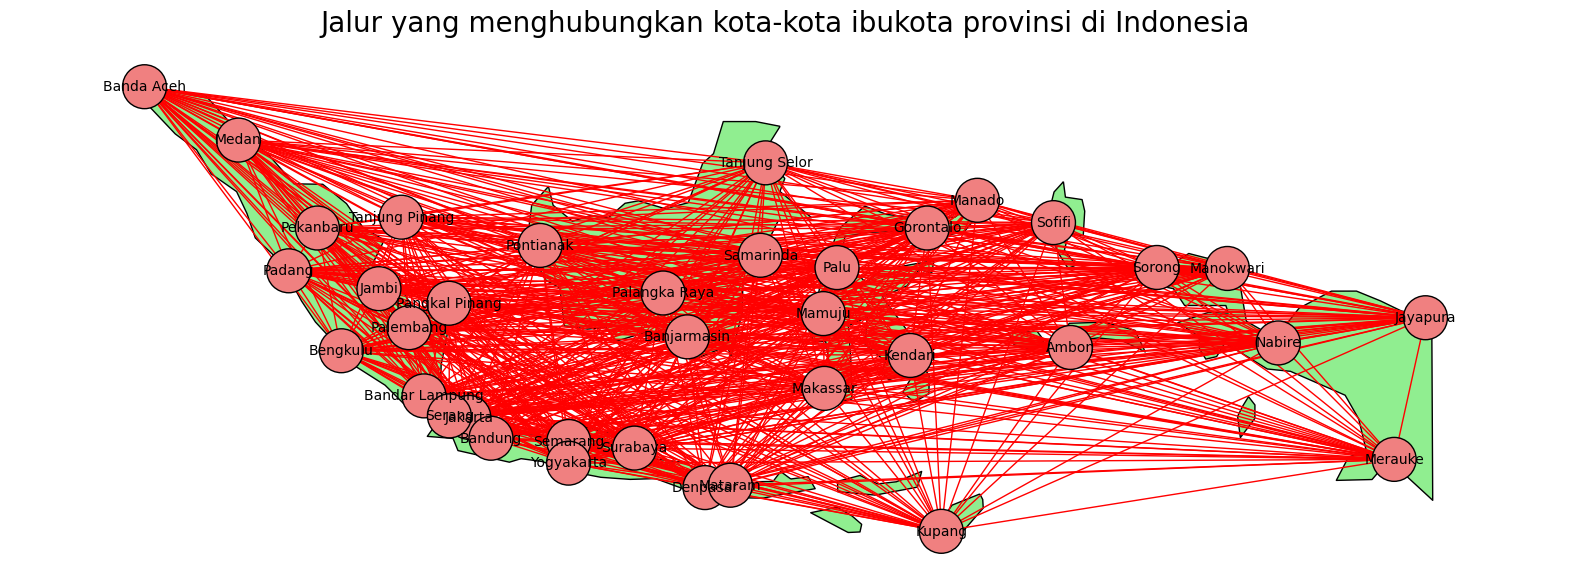

In [23]:
# Inisialisasi graph untuk jalur transportasi yang menghubungkan kota-kota ibukota provinsi di Indonesia.
G = nx.Graph()

# Menambahkan node dengan koordinat sebagai atribut
for city, (lat, lon) in ibukota_provinsi.items():
    G.add_node(city, pos=(lon, lat))

# Menambahkan edge (jalur transportasi udara) & semua kombinasi edge (untuk semua kota terhubung ke semua kota)
for city1 in ibukota_provinsi:
    for city2 in ibukota_provinsi:
        if city1 != city2:
            G.add_edge(city1, city2)

# Menghitung degree centrality dan betweenness centrality untuk graf udara
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Menentukan kota terpenting berdasarkan degree centrality dan betweenness centrality
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)

# Menentukan kota dengan degree centrality dan betweenness centrality tertinggi
def get_top_cities(centrality_dict):
    return max(centrality_dict, key=centrality_dict.get)

top_degree = get_top_cities(degree_centrality)
top_betweenness = get_top_cities(betweenness_centrality)

print(f"Kota dengan Degree Centrality tertinggi di udara: {top_degree}")
print(f"Kota dengan Betweenness Centrality tertinggi di udara: {top_betweenness}")

# Mengupdate ukuran node berdasarkan degree centrality
node_size_udara = [1000 * degree_centrality[city] for city in G.nodes()]

# Membuat visualisasi jaringan dengan peta Indonesia sebagai latar belakang
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
indonesia = world[(world.name == "Indonesia")]

def plot_graph(G, node_size, edge_color, node_color, title, ax, label, width):
    # Menggambar peta dengan latar belakang berwarna hijau
    indonesia.plot(ax=ax, color='lightgreen', edgecolor='black')

    # Menggambar node
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, ax=ax, edgecolors='black', label=label)

    # Menggambar edge
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color=edge_color, width=width)

    # Menggambar label
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)

    ax.set_title(title)
    ax.set_axis_off()

fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Latar belakang seluruh plot

plot_graph(G, node_size_udara, 'red', 'lightcoral', "Jalur yang menghubungkan kota-kota ibukota provinsi di Indonesia", ax, "Udara", 1)

plt.title("Jalur yang menghubungkan kota-kota ibukota provinsi di Indonesia", fontsize=20)
plt.show()


Membuat visualisasi jaringan yang merepresentasikan jalur transportasi udara yang mungkin bisa dilalui dari kota ke kota lainnya khususnya untuk kota-kota ibukota provinsi di Indonesia

Degree Centrality Udara: {'Banda Aceh': 0.027777777777777776, 'Medan': 0.08333333333333333, 'Padang': 0.027777777777777776, 'Pekanbaru': 0.0, 'Tanjung Pinang': 0.0, 'Jambi': 0.0, 'Palembang': 0.027777777777777776, 'Pangkal Pinang': 0.0, 'Bengkulu': 0.0, 'Bandar Lampung': 0.0, 'Jakarta': 0.3055555555555555, 'Bandung': 0.0, 'Serang': 0.0, 'Semarang': 0.027777777777777776, 'Yogyakarta': 0.027777777777777776, 'Surabaya': 0.1111111111111111, 'Denpasar': 0.1111111111111111, 'Mataram': 0.027777777777777776, 'Kupang': 0.027777777777777776, 'Pontianak': 0.027777777777777776, 'Palangka Raya': 0.0, 'Banjarmasin': 0.08333333333333333, 'Samarinda': 0.0, 'Tanjung Selor': 0.0, 'Manado': 0.08333333333333333, 'Palu': 0.027777777777777776, 'Makassar': 0.2222222222222222, 'Kendari': 0.027777777777777776, 'Gorontalo': 0.027777777777777776, 'Mamuju': 0.0, 'Ambon': 0.05555555555555555, 'Sofifi': 0.0, 'Manokwari': 0.0, 'Nabire': 0.0, 'Merauke': 0.0, 'Sorong': 0.027777777777777776, 'Jayapura': 0.1111111111111

<ipython-input-24-24054bad809b>:47: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


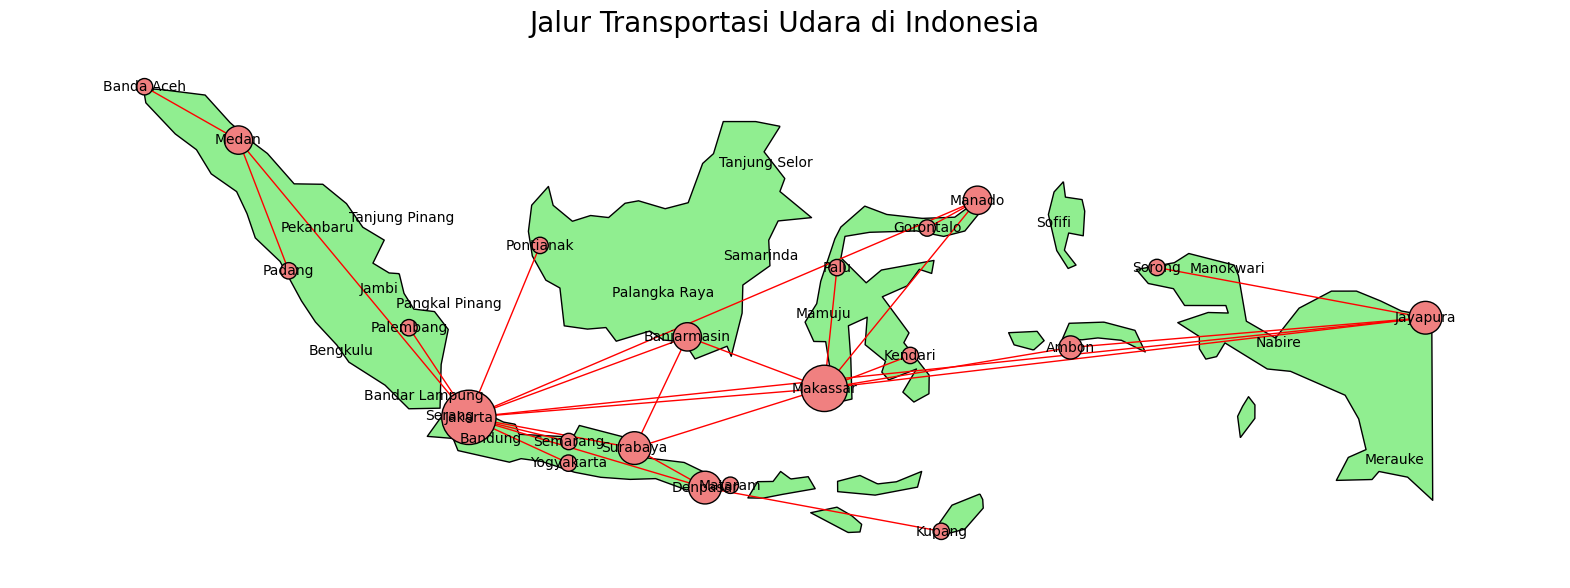

In [24]:
# Inisialisasi graph untuk jalur transportasi udara
G_udara = nx.Graph()

# Menambahkan node dengan koordinat sebagai atribut
for city, (lat, lon) in ibukota_provinsi.items():
    G_udara.add_node(city, pos=(lon, lat))

# Menambahkan edge (jalur transportasi udara) dan kemungkinan jalur penerbangan yang dilayani di Indonesia
edges_udara = [
    ("Jakarta", "Medan"), ("Jakarta", "Surabaya"), ("Jakarta", "Denpasar"),
    ("Jakarta", "Makassar"), ("Jakarta", "Jayapura"), ("Jakarta", "Manado"),
    ("Medan", "Banda Aceh"), ("Medan", "Padang"), ("Surabaya", "Denpasar"),
    ("Surabaya", "Makassar"), ("Makassar", "Manado"), ("Makassar", "Jayapura"),
    ("Denpasar", "Mataram"), ("Denpasar", "Kupang"), ("Pontianak", "Jakarta"),
    ("Banjarmasin", "Jakarta"), ("Banjarmasin", "Surabaya"), ("Banjarmasin", "Makassar"),
    ("Manado", "Gorontalo"), ("Manado", "Ternate"), ("Jayapura", "Sorong"),
    ("Jayapura", "Ambon"), ("Palembang", "Jakarta"), ("Semarang", "Jakarta"),
    ("Yogyakarta", "Jakarta"), ("Banjarmasin", "Surabaya"), ("Palu", "Makassar"),
    ("Kendari", "Makassar"), ("Ambon", "Makassar")
]

edges_udara = [(a, b) for a, b in edges_udara if a in ibukota_provinsi and b in ibukota_provinsi]
G_udara.add_edges_from(edges_udara)

# Menghitung degree centrality dan betweenness centrality untuk graf udara
degree_centrality_udara = nx.degree_centrality(G_udara)
betweenness_centrality_udara = nx.betweenness_centrality(G_udara)

# Menentukan kota terpenting berdasarkan degree centrality dan betweenness centrality
print("Degree Centrality Udara:", degree_centrality_udara)
print("Betweenness Centrality Udara:", betweenness_centrality_udara)

# Menentukan kota dengan degree centrality dan betweenness centrality tertinggi
def get_top_cities(centrality_dict):
    return max(centrality_dict, key=centrality_dict.get)

top_degree_udara = get_top_cities(degree_centrality_udara)
top_betweenness_udara = get_top_cities(betweenness_centrality_udara)

print(f"Kota dengan Degree Centrality tertinggi di udara: {top_degree_udara}")
print(f"Kota dengan Betweenness Centrality tertinggi di udara: {top_betweenness_udara}")

# Mengupdate ukuran node berdasarkan degree centrality dengan skala yang lebih kecil
node_size_udara = [5000 * degree_centrality_udara[city] for city in G_udara.nodes()]

# Membuat visualisasi jaringan dengan peta Indonesia sebagai latar belakang
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
indonesia = world[(world.name == "Indonesia")]

def plot_graph(G, node_size, edge_color, node_color, title, ax, label, width):
    # Menggambar peta dengan latar belakang berwarna hijau
    indonesia.plot(ax=ax, color='lightgreen', edgecolor='black')

    # Menggambar node
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, ax=ax, edgecolors='black', label=label)

    # Menggambar edge
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color=edge_color, width=width)

    # Menggambar label
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)

    ax.set_title(title)
    ax.set_axis_off()

fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Latar belakang seluruh plot

plot_graph(G_udara, node_size_udara, 'red', 'lightcoral', "Jalur Transportasi Udara", ax, "Udara", 1)

plt.title("Jalur Transportasi Udara di Indonesia", fontsize=20)
plt.show()
